# Обнаружение мошенничества с кредитными картами
**Анонимные транзакции по кредитным картам, помеченные как мошеннические или подлинные.**

https://www.kaggle.com/mlg-ulb/creditcardfraud

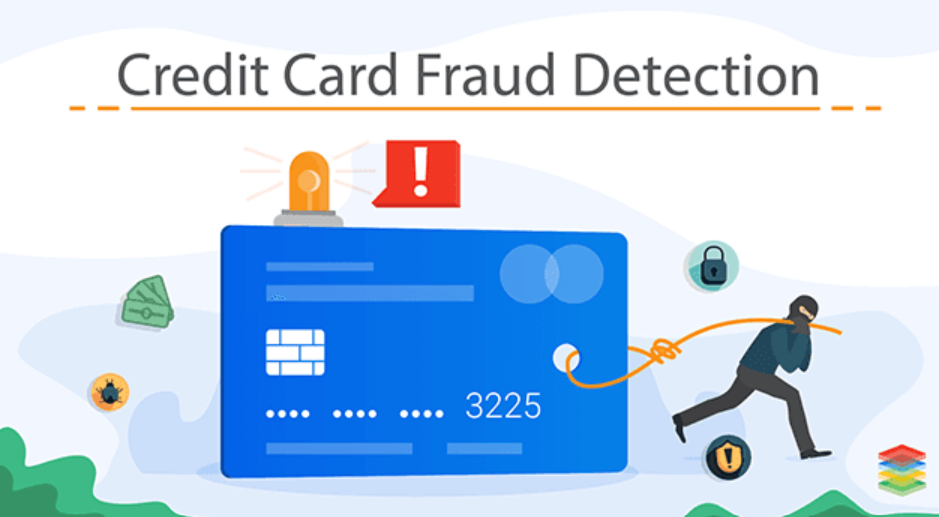

Контекст
Важно, чтобы компании-эмитенты кредитных карт могли распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов не взималась плата за товары, которые они не покупали.

Содержание
Набор данных содержит транзакции, совершенные с помощью кредитных карт в сентябре 2013 года держателями карт из Европы.
В этом наборе данных представлены транзакции, которые произошли за два дня, из которых у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Характеристики V1, V2,… V28 - это основные компоненты, полученные с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция «Сумма» - это сумма транзакции, эту функцию можно использовать для обучения, зависящего от стоимости, в зависимости от примера. Функция «Класс» - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

## Считывание и работа с данными

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score

In [ ]:
def my_metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
# Считаем данные
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Science Lab/Course 3/Project/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Категориальных признаков не найдено.**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

**Нулевых значений не найдено**

### Удаление выбросов от данных

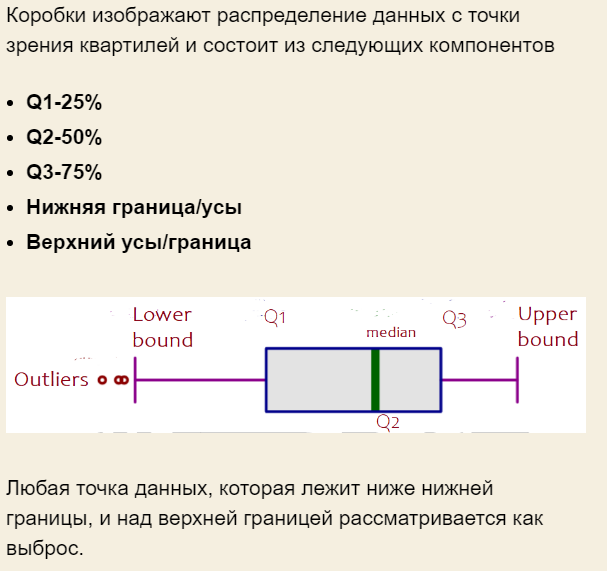

Поиск возможных выбросов

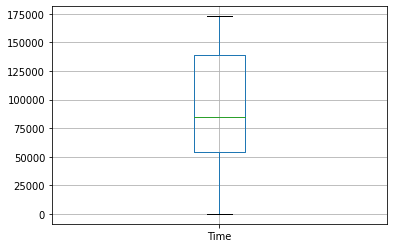

In [ ]:
numeric = ['Time']
df.boxplot(numeric)

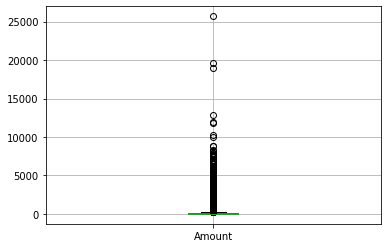

In [ ]:
numeric = ['Amount']
df.boxplot(numeric)

In [ ]:
for x in ['Amount']:
  q75, q25 = np.percentile(df.loc[:, x], [75,25])
  intr_qr = q75 - q25
  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  df.loc[df[x] < min, x] = np.nan
  df.loc[df[x] > max, x] = np.nan

df.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount    31904
Class         0
dtype: int64

In [ ]:
df = df.dropna(axis = 0)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

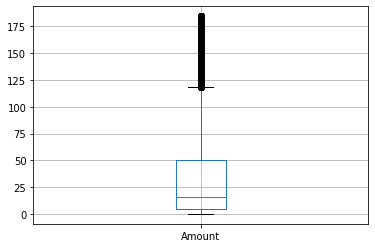

In [ ]:
numeric = ['Amount']
df.boxplot(numeric)

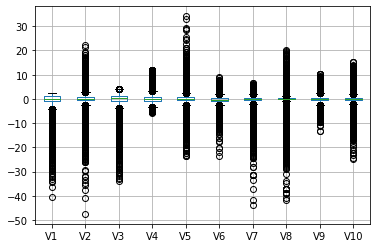

In [ ]:
numeric = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
df.boxplot(numeric)

### Корреляционная матрица

>Корреляция – связь между двумя метрическими переменными. При построении корреляции, мы ищем признаки, зависимые друг от друга или каким-либо образом влияющие на значения друг друга. Если корреляция между признаками по модулю высокая, они будут "мешаться" друг другу при обучении линейной модели, потому что вносят похожую информацию.  Удобное представление коэффициентов корреляции - тепловая карта, представленная ниже.





In [ ]:
df.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0,0.13,-0.017,-0.42,-0.11,0.19,-0.065,0.097,-0.037,-0.0016,0.023,-0.25,0.14,-0.071,-0.11,-0.2,0.0085,-0.07,0.094,0.032,-0.064,0.048,0.15,0.072,-0.012,-0.24,-0.036,-0.0067,-0.012,-0.026,-0.014
V1,0.13,1.0,-0.33,-0.07,0.063,-0.076,0.051,0.15,-0.055,0.0091,-0.034,0.016,-0.00015,0.016,-0.0074,0.02,0.043,-0.011,-0.0091,0.0031,-0.09,-0.032,-0.0062,-0.00093,0.003,0.01,-0.002,0.024,0.037,-0.012,-0.11
V2,-0.017,-0.33,1.0,-0.19,0.1,-0.16,0.048,0.21,-0.034,0.019,-0.021,0.011,0.016,0.019,0.015,0.014,0.015,0.018,0.012,-0.035,0.33,0.06,-0.073,-0.093,0.002,-0.015,-0.0014,-0.014,0.1,-0.29,0.12
V3,-0.42,-0.07,-0.19,1.0,0.028,-0.084,0.045,0.15,-0.047,-0.02,-0.011,0.0057,-0.008,0.0076,0.025,0.014,-0.0011,-0.015,-0.0065,-0.005,0.022,0.005,-0.012,-0.12,0.0041,-0.031,0.0027,0.014,0.019,0.024,-0.2
V4,-0.11,0.063,0.1,0.028,1.0,0.022,-0.017,-0.04,0.0053,-0.013,-0.0038,-0.0016,-0.0019,-0.002,-0.0041,-0.0069,-0.021,0.012,-0.00083,0.0066,-0.048,-0.0072,0.012,0.045,-0.006,0.011,-0.0064,-0.0087,-0.023,-0.034,0.14
V5,0.19,-0.076,-0.16,-0.084,0.022,1.0,0.19,0.34,-0.079,-0.021,-0.065,0.0067,-0.019,0.0039,-0.018,-0.0027,0.017,0.0018,0.0095,-0.0037,0.041,0.0015,-0.015,-0.079,0.015,-0.031,0.0036,0.059,-0.038,-0.16,-0.11
V6,-0.065,0.051,0.048,0.045,-0.017,0.19,1.0,-0.2,0.048,0.0022,0.036,-0.011,0.0041,-0.0035,0.011,0.0015,-0.024,-0.003,0.0095,0.0051,0.024,0.018,-0.0025,0.013,0.012,0.017,0.00018,-0.044,0.02,0.082,-0.048
V7,0.097,0.15,0.21,0.15,-0.04,0.34,-0.2,1.0,0.052,0.034,0.064,-0.0064,0.029,-0.013,-0.01,-0.014,-0.028,0.015,-0.015,0.007,-0.0016,-0.026,-0.0052,-0.088,-0.0044,-0.013,-0.012,-0.044,0.022,-0.065,-0.24
V8,-0.037,-0.055,-0.034,-0.047,0.0053,-0.079,0.048,0.052,1.0,-0.0077,-0.0097,-0.0026,0.0064,-0.0013,0.015,0.0039,0.016,0.0048,0.003,-0.0026,-0.044,-0.061,0.01,-0.092,0.012,-0.0069,0.0028,0.038,0.012,0.021,0.017
V9,-0.0016,0.0091,0.019,-0.02,-0.013,-0.021,0.0022,0.034,-0.0077,1.0,0.027,-0.0028,-0.028,0.0055,0.02,-0.011,-0.023,0.0029,0.015,-0.02,0.098,0.011,-0.0057,0.054,0.00014,0.01,0.0062,0.017,-0.05,-0.064,-0.1


### Удаляем ненужный признак

Время также не является полезной переменной, поскольку оно содержит секунды, прошедшие между транзакцией для этой записи и первой транзакцией в наборе данных. Таким образом, данные всегда в порядке возрастания.

Давайте пока удалим функцию «Время».

In [ ]:
df.drop(labels = ['Time'], axis = 1, inplace=True)

### Нормализация данных

Нормализация данных – это процедура предобработки входной информации (обучающих, тестовых и валидационных выборок, а также реальных данных), при которой значения признаков во входном векторе приводятся к некоторому заданному диапазону, например, [0…1] или [-1…1].

Проверим разброс значений колонки "Сумма".

count    252903.000000
mean         34.974887
std          42.172250
min           0.000000
25%           4.490000
50%          16.000000
75%          49.990000
max         184.500000
Name: Amount, dtype: float64

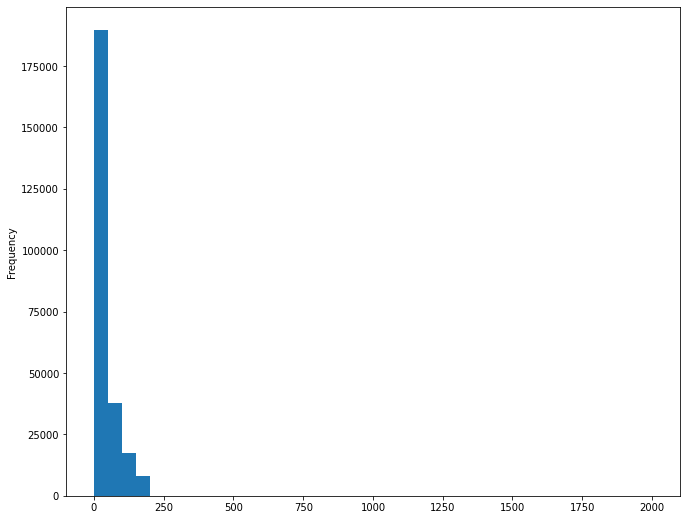

In [ ]:
df['Amount'].plot.hist(bins=40,range=[0, 2000], figsize=(11, 9))
df.describe()['Amount']

Из графика мы видим разброс значений колонки "Сумма", а также если сравнить эти значения со значениями из колонок V1-V28, мы увидим, что разница в значениях слишком высока, поэтому воспользуемся методом нормализации данных.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df['Amount'] = StandardScaler().fit_transform(df.Amount.values.reshape(-1,1))

Проверяем

In [ ]:
df.Amount

0         2.718502
1        -0.765550
3         2.099136
4         0.830290
5        -0.742312
            ...   
284801   -0.765550
284802   -0.811077
284803   -0.241507
284804    0.780257
284805   -0.592213
Name: Amount, Length: 252903, dtype: float64

### Визуализация распределения:

In [ ]:
data_plot = df.select_dtypes(include=[np.number]).dropna()
sns.pairplot(data_plot)

Планировали показать визуализацию распределения, но из-за большого количества данных - виртуальная машина не справляется, чтобы отобразить все необходимые графики.

## Обучение

### Отделяем целевую переменную, разделяем на train, test

За целевую переменную в данной задаче необходимо взять колонку 'Class', потому что именно она соотвественно показывает была совершенная операция мошеннической или нет.

In [ ]:
x = df.drop("Class",axis=1)
# х - содержит все столбцы, кроме соотвественнно целевой переменной
y = df['Class']
# y - содержит все столбцы

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)
# делим наши выборки в отношении - 1 к 4, при тестах - это выдает наилучший результат
# random_state=42 - train_test_splitразбивает массивы или матрицы на случайные обучающие и тестовые подмножества. 
# Это означает, что каждый раз, когда вы запускаете его без указания random_state, вы получите другой результат, это ожидаемое поведение.

### SMOTE для несбалансированной классификации

Несбалансированная классификация включает разработку прогнозных моделей для наборов данных классификации, которые имеют серьезный дисбаланс классов.

Проблема работы с несбалансированными наборами данных заключается в том, что большинство методов машинного обучения будут игнорировать класс меньшинства и, в свою очередь, будут иметь низкую производительность, хотя обычно производительность в классе меньшинства является наиболее важной.

Один из подходов к устранению несбалансированных наборов данных - это чрезмерная выборка класса меньшинства. Самый простой подход включает дублирование примеров в классе меньшинства, хотя эти примеры не добавляют в модель никакой новой информации. Вместо этого новые примеры могут быть синтезированы из существующих примеров. Это тип увеличения данных для класса меньшинства и называется техникой синтетической передискретизации меньшинства , или сокращенно SMOTE .

**Визуализация данных для проверки распределения для подлинных случаев и случаев мошенничества для каждой функции**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

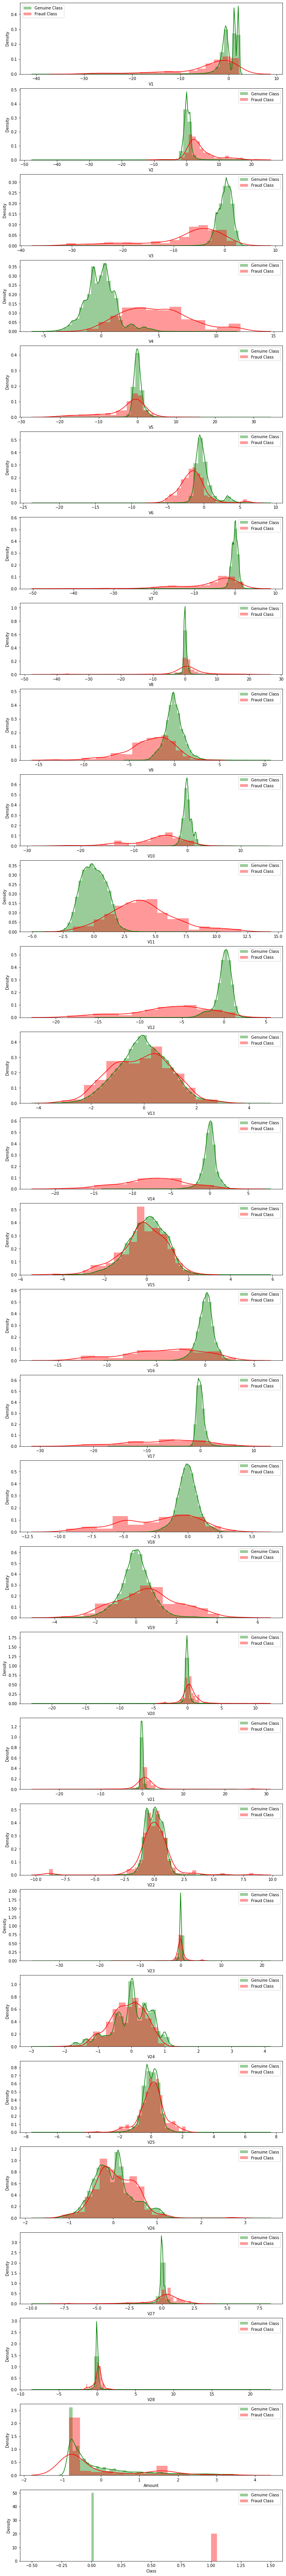

In [ ]:
v_features = df.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df['Class']==0],color='g',label='Genuine Class')
    sns.distplot(df[col][df['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

In [ ]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Количество транзакций без мошенничества: ", non_fraud)
print("Количество транзакций с мошенничеством: ", fraud)
print("Отношение транзакций без мошенничества к транзакциями с мошенничеством: {:.4f}".format(fraud_percent))

Количество транзакций без мошенничества:  252502
Количество транзакций с мошенничеством:  401
Отношение транзакций без мошенничества к транзакциями с мошенничеством: 0.1586


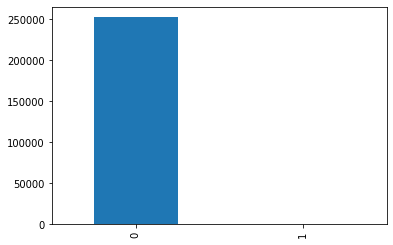

In [ ]:
df.Class.value_counts().plot.bar()

AFTER SMOTE


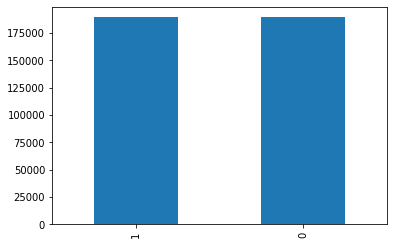

In [ ]:
smote = SMOTE(random_state=42)
X,Y  = smote.fit_resample(x_train, y_train)

print("AFTER SMOTE")
Y.value_counts().plot.bar()

Проверяем

In [ ]:
X.shape,Y.shape

((378774, 29), (378774,))

## F1-Score vs Accuracy

### Визуализация

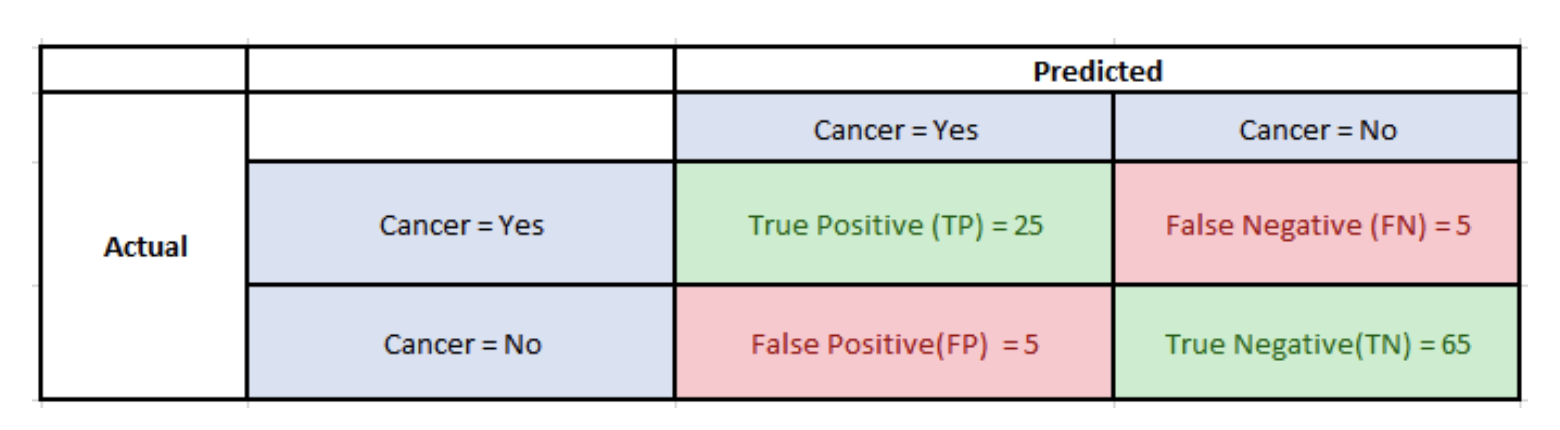

### Объяснение

1 — Precision : подразумевается как мера правильно идентифицированных положительных случаев из всех предсказанных положительных случаев. Таким образом, это полезно, когда цена ложных срабатываний высока.

2 — Recall : это мера правильно идентифицированных положительных случаев из всех реальных положительных случаев. Это важно, когда стоимость ложных негативов высока.

3 — Accuracy: один из наиболее очевидных показателей, это мера всех правильно идентифицированных случаев. Чаще всего используется, когда все классы одинаково важны.

Наша модель должна попытаться свести к минимуму ложноотрицательные результаты.
Для этих случаев мы используем оценку F1.
4 — F1-score: это среднее гармоническое значение точности и отзыва, которое дает лучшую меру неправильно классифицированных случаев, чем показатель точности.

**Подводя итог различию между оценкой F1-score и Accuracy:**

**Точность используется, когда истинные положительные и истинные отрицательные результаты более важны, в то время как F1-оценка используется, когда ложные отрицательные и ложные положительные результаты имеют решающее значение.
Точность может использоваться, когда распределение классов аналогично, тогда как F1-оценка является лучшим показателем, когда есть несбалансированные классы, как в приведенном выше случае.**

**В большинстве реальных задач классификации существует несбалансированное распределение классов, и поэтому F1-оценка является лучшим показателем для оценки нашей модели.**

## Работа с алгоритмами

Может быть более гибким прогнозирование вероятностей принадлежности наблюдения к каждому классу в задаче классификации, а не непосредственное прогнозирование классов.

Эта гибкость проистекает из того, что вероятности могут быть интерпретированы с использованием различных пороговых значений, которые позволяют оператору модели найти компромисс между ошибками, допущенными моделью, такими как количество ложных срабатываний по сравнению с количеством ложноотрицательных результатов. Это требуется при использовании моделей, в которых стоимость одной ошибки превышает стоимость ошибок других типов.

**Два средств диагностики , которые помогают в интерпретации вероятностного прогноза на двоичный (два класса) задачи классификации интеллектуального моделирования являются ROC кривые и Precision Recall Curve .**

**Пользоваться соотвественно мы будем Precision Recall Curve**

Precision-Recall curves - суммируют компромисс между истинно положительным коэффициентом и положительной прогностической ценностью для прогностической модели с использованием различных пороговых значений вероятности.

### DecisionTreeClassifier

***Это метод поддержки принятия решений, основанный на использовании древовидного графа: модели принятия решений, которая учитывает их потенциальные последствия (с расчётом вероятности наступления того или иного события), эффективность, ресурсозатратность. Для бизнес-процессов это дерево складывается из минимального числа вопросов, предполагающих однозначный ответ — «да» или «нет». Последовательно дав ответы на все эти вопросы, мы приходим к правильному выбору. Методологические преимущества дерева принятия решений – в том, что оно структурирует и систематизирует проблему, а итоговое решение принимается на основе логических выводов. Решающее дерево- покрывающий набор конъюнкций. Требование максимизации информативности конъюнкций означает, что каждая из них должна выделять как можно больше обучающих объектов, допуская при этом как можно меньше ошибок. Для повышения обобщающей способности решающего дерева число листьев должно быть как можно меньше, и они должны покрывать подвыборки примерно одинаковой мощности.***

In [ ]:
# parameters = {'min_samples_split': np.arange(2, 10),
#                   'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 8)}
# model_decision_grid = DecisionTreeClassifier()
# model_grid = GridSearchCV(model_decision_grid, parameters, cv=5)
# model_grid.fit(X, Y)
# print(model_grid.best_params_)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X, Y)
y_pred = dt.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
my_metrics(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred)

Accuracy: 0.99774
Precision: 0.42308
Recall: 0.79279
F1-score: 0.55172


Text(0.5, 1.0, 'Precision Recall Curve')

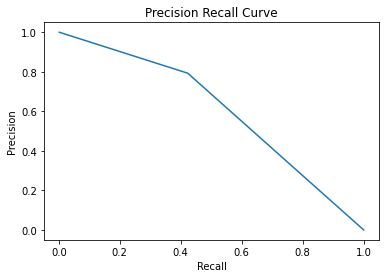

In [ ]:
y_pred_prob = dt.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

### RandomForestClassifier

**Случайные леса - это алгоритм обучения с учителем. Его можно использовать как для классификации, так и для регрессии. Это также самый гибкий и простой в использовании алгоритм. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств, предложенный Tin Kam Ho.Лес состоит из деревьев. Говорят, что чем больше деревьев, тем крепче лес. Случайные леса создают деревья решений для случайно выбранных выборок данных, получают прогнозы от каждого дерева и выбирают лучшее решение посредством голосования. Это также довольно хороший индикатор важности функции.**

**Случайные леса имеют множество приложений, таких как механизмы рекомендаций, классификация изображений и выбор функций. Его можно использовать для классификации лояльных соискателей кредита, выявления мошенничества и прогнозирования заболеваний. Он лежит в основе алгоритма Борута, который выбирает важные функции в наборе данных.**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X, Y)
y_pred = rf.predict(x_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
my_metrics(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)

Accuracy: 0.99957
Precision: 0.90385
Recall: 0.84685
F1-score: 0.87442


Text(0.5, 1.0, 'Precision Recall Curve')

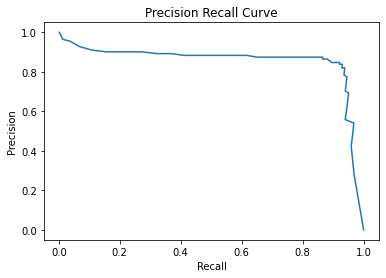

In [ ]:
y_pred_prob = rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

### LogisticRegression

**Логистическая регрессия — это разновидность множественной регрессии, общее назначение которой состоит в анализе связи между несколькими независимыми переменными (называемыми также регрессорами или предикторами) и зависимой переменной. Бинарная логистическая регрессия применяется в случае, когда зависимая переменная является бинарной (т.е. может принимать только два значения). С помощью логистической регрессии можно оценивать вероятность того, что событие наступит для конкретного испытуемого (больной/здоровый, возврат кредита/дефолт и т.д.). Соотвественно подходит для нашей задачи по поиску мошенничества (0, 1)**

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, Y)
y_pred = logreg.predict(x_test)
logreg_cnf_matrix = confusion_matrix(y_test, y_pred)
my_metrics(y_test, y_pred)
logreg_f1_score = f1_score(y_test, y_pred)

Accuracy: 0.98127
Precision: 0.08053
Recall: 0.92793
F1-score: 0.14820


Text(0.5, 1.0, 'Precision Recall Curve')

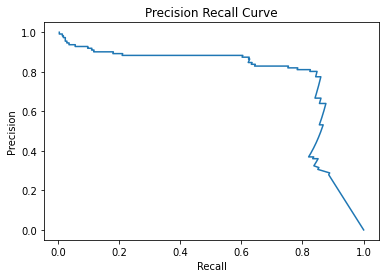

In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

## Вывод

No handles with labels found to put in legend.


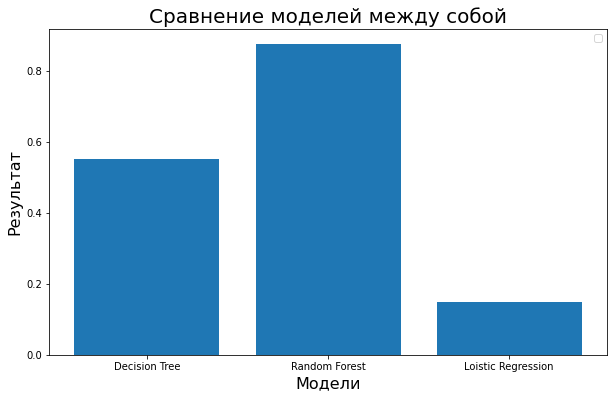

In [ ]:
names = ['Decision Tree', 'Random Forest', 'Loistic Regression']
results = [dt_f1_score, rf_f1_score, logreg_f1_score]
plt.figure(figsize=(10,6))
plt.bar(names,results)
plt.xlabel("Модели", fontsize=16)
plt.ylabel("Результат", fontsize=16)
plt.title("Сравнение моделей между собой", fontsize=20)
plt.legend()
plt.show()

**Вывод(письменно):**

-Мы поработали с данными, привели их к нормальному виду, избавились от выбросов.

-Применение метода SMOTE к нашему несбалансированному набору данных помогло нам сбалансировать данные.

-После сравнения моделей мы обнаружили, что RandomForestClassifier дал нам лучший результат.

# Полезные ссылки

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/